In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install nbformat>=4.2.0


In [2]:
import requests 
import json 
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from kmodes.kprototypes import KPrototypes
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
from statsmodels.graphics.mosaicplot import mosaic
from pandas.plotting import parallel_coordinates
import prince
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\Reputation System\\final\\filecoin_messages_cleaned_jan22jan24_compiled1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2656000 entries, 0 to 2655999
Data columns (total 19 columns):
 #   Column              Dtype  
---  ------              -----  
 0   date                object 
 1   sender_account      object 
 2   sender_address      object 
 3   sender_type         object 
 4   receiver_account    object 
 5   receiver_address    object 
 6   receiver_type       object 
 7   method_id           int64  
 8   method_name         object 
 9   refundDecimal       float64
 10  refund              float64
 11  amountDecimal       float64
 12  burnedDecimal       float64
 13  overEstimationBurn  float64
 14  baseFeeBurn         float64
 15  success             bool   
 16  minerPenalty        float64
 17  minerTip            float64
 18  exitCode            int64  
dtypes: bool(1), float64(8), int64(2), object(8)
memory usage: 367.3+ MB


In [4]:
df['success'] = df['success'].astype(int)

In [5]:
df.shape

(2656000, 19)

In [6]:
#df_encoded.info()
null_values = df.isnull().sum()

# Display the count of null values for each column
print(null_values)

date                       0
sender_account             0
sender_address             0
sender_type                0
receiver_account        2289
receiver_address           0
receiver_type              0
method_id                  0
method_name           925348
refundDecimal              0
refund                     0
amountDecimal              0
burnedDecimal              0
overEstimationBurn         0
baseFeeBurn                0
success                    0
minerPenalty               0
minerTip                   0
exitCode                   0
dtype: int64


In [7]:



filtered_df = df[(df['success'] == True) & (df['minerPenalty'] == 0)]

num_records_to_remove = 2500000  


if num_records_to_remove >= len(filtered_df):
    print("Number of records to remove exceeds or is equal to the available records.")
 
else:
    # Randomly select indices to remove
    indices_to_remove = np.random.choice(filtered_df.index, size=num_records_to_remove, replace=False)

    # Create a new DataFrame with the dropped rows
    dropped_rows_df = df.loc[indices_to_remove]

    # Drop the selected indices from the original DataFrame
    filtered_df = df.drop(indices_to_remove)

    # Save the dropped rows DataFrame to a CSV file
    dropped_rows_df.to_csv('dropped_rows.csv', index=False)
    filtered_df.to_csv('used_rows.csv', index=False)


# Display information about the filtered DataFrame
filtered_df.shape
dropped_rows_df.shape




(2500000, 19)

In [8]:
filtered_df.head()

,date,sender_account,sender_address,sender_type,receiver_account,receiver_address,receiver_type,method_id,method_name,refundDecimal,refund,amountDecimal,burnedDecimal,overEstimationBurn,baseFeeBurn,success,minerPenalty,minerTip,exitCode
6,2022-01-01,f01622188,f3uehr5nzkjto27qp42ubj5353lp2cyywbwtop7bp2tc26...,fil/6/account,f0117586,f2iefjh6ttnek4nbn7ormancgueqcviinepuppg5y,fil/6/storageminer,16,WithdrawBalance,1.191485e-08,1.191485e-08,0.000000,1.022018e-09,3.411290e-11,9.879055e-10,1,0.0,1.225480e-06,0
69,2022-01-01,f01279833,f1hvucsnkful7hzrmuuk434sbicggzsz7jnsko32q,fil/6/account,f01657967,f1y2kwseoxgp5dkkkf5vouqm3cdwmwtm6hu4fdjoi,fil/6/account,0,Transfer,3.138488e-10,3.138488e-10,273.219100,2.938213e-10,0.000000e+00,2.938214e-10,1,0.0,5.145861e-07,0
73,2022-01-01,f01026536,f3w2pjekez7pmiimj5pwjjk774zfnlvyscjencebbf437i...,fil/6/account,f01384170,f1gflfsy5523jnyp5r3nf6g2woothq4gdidpp4sbq,fil/6/account,0,Transfer,5.377940e-10,5.377940e-10,10.900000,4.550140e-11,1.644600e-12,4.385680e-11,1,0.0,5.473712e-08,0
99,2022-01-01,f0683354,f1kw4ms5bt2kl67ejd2kkjxbq6cpaos3hejzalliy,fil/6/account,f023933,f13sb4pa34qzf35txnan4fqjfkwwqgldz6ekh5trq,fil/6/account,0,Transfer,6.164539e-03,6.164539e-03,10.862871,5.116620e-11,1.849400e-12,4.931680e-11,1,0.0,6.135935e-08,0
148,2022-01-01,f01503519,f3ugesb7mvq6wsph7ajymfaxber34ucttqu5agdy4xs72j...,fil/6/account,f01263781,f3s4cg7gznbb2cbdiba2pfd6pojvzneqz6e7oub32v4nhw...,fil/6/account,0,Transfer,5.755996e-10,5.755997e-10,5.000000,5.188340e-11,1.875300e-12,5.000814e-11,1,0.0,5.917035e-08,0


In [9]:
numerical_features = ['refund', 'refundDecimal', 'amountDecimal', 'burnedDecimal', 'overEstimationBurn', 'baseFeeBurn', 'minerPenalty', 'minerTip']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical features
filtered_df[numerical_features] = scaler.fit_transform(filtered_df[numerical_features])

In [10]:
filtered_df.head()

,date,sender_account,sender_address,sender_type,receiver_account,receiver_address,receiver_type,method_id,method_name,refundDecimal,refund,amountDecimal,burnedDecimal,overEstimationBurn,baseFeeBurn,success,minerPenalty,minerTip,exitCode
6,2022-01-01,f01622188,f3uehr5nzkjto27qp42ubj5353lp2cyywbwtop7bp2tc26...,fil/6/account,f0117586,f2iefjh6ttnek4nbn7ormancgueqcviinepuppg5y,fil/6/storageminer,16,WithdrawBalance,4.792409e-13,4.792409e-13,0.000000e+00,3.889213e-13,6.318407e-14,3.903176e-13,1,0.0,4.061238e-09,0
69,2022-01-01,f01279833,f1hvucsnkful7hzrmuuk434sbicggzsz7jnsko32q,fil/6/account,f01657967,f1y2kwseoxgp5dkkkf5vouqm3cdwmwtm6hu4fdjoi,fil/6/account,0,Transfer,1.262368e-14,1.262368e-14,8.828168e-06,1.118115e-13,0.000000e+00,1.160877e-13,1,0.0,1.705337e-09,0
73,2022-01-01,f01026536,f3w2pjekez7pmiimj5pwjjk774zfnlvyscjencebbf437i...,fil/6/account,f01384170,f1gflfsy5523jnyp5r3nf6g2woothq4gdidpp4sbq,fil/6/account,0,Transfer,2.163123e-14,2.163124e-14,3.521973e-07,1.731521e-14,3.046136e-15,1.732765e-14,1,0.0,1.813987e-10,0
99,2022-01-01,f0683354,f1kw4ms5bt2kl67ejd2kkjxbq6cpaos3hejzalliy,fil/6/account,f023933,f13sb4pa34qzf35txnan4fqjfkwwqgldz6ekh5trq,fil/6/account,0,Transfer,2.479510e-07,2.479510e-07,3.509976e-07,1.947091e-14,3.425467e-15,1.948487e-14,1,0.0,2.033448e-10,0
148,2022-01-01,f01503519,f3ugesb7mvq6wsph7ajymfaxber34ucttqu5agdy4xs72j...,fil/6/account,f01263781,f3s4cg7gznbb2cbdiba2pfd6pojvzneqz6e7oub32v4nhw...,fil/6/account,0,Transfer,2.315186e-14,2.315186e-14,1.615584e-07,1.974383e-14,3.473439e-15,1.975802e-14,1,0.0,1.960904e-10,0


In [11]:
attribute_df = filtered_df.loc[:, ['date', 'sender_account', 'sender_address', 'sender_type', 'receiver_account', 'receiver_address', 'receiver_type', 'method_name']]
num_df = filtered_df.drop(columns=['date', 'sender_account', 'sender_address', 'sender_type', 'receiver_account', 'receiver_address', 'receiver_type', 'method_name'])


In [12]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [13]:
hopkins(num_df)

0.9999999999993998

In [12]:
num_df.columns

Index(['method_id', 'refundDecimal', 'refund', 'amountDecimal',
       'burnedDecimal', 'overEstimationBurn', 'baseFeeBurn', 'success',
       'minerPenalty', 'minerTip', 'exitCode'],
      dtype='object')

In [13]:
categorical_indices = [num_df.columns.get_loc(col) for col in ['method_id', 'success', 'exitCode']]
categorical_indices

[0, 7, 10]

In [14]:
famd_df=num_df

In [15]:
famd=prince.FAMD(
    n_components=30,
    n_iter=6,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
famd.fit(famd_df)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-1.0466613587975817, -0.013155870289605437, -0.3127729577136154, -0.3691596485991476, -0.005370861555295747, -0.3635826009207642, -0.08570970683740464, -0.06316949117560323, -0.05692437628454628, -0.030853250670279084, -0.0031008683647302114, -0.008770580193070292, -0.006201736729460423, -0.14942196316781237, -0.8024421857918872, -0.009302605094190635, -0.24023225941063467, -0.13822362037933036, -0.1547330206914726, -0.6110992617343828, -0.21798906112287098, -0.34769847680027416, -0.07098212125924061, -0.03835562339675691, -0.14935759876113536, -0.046924653189161426, -0.16323060610446427, -0.019364916731037084, -0.012785207798918972, -0.0075955452531275, -0.006933752452815365, -0.035355339059327376, -0.08836114704830572, -0.07364154345936079, -0.07084652969080964, -0.04428925898610702, -0.04396239651898322, -0.36143410

FAMD(n_components=30, n_iter=6, random_state=42)

In [16]:
famd.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,3.630,5.01%,5.01%
1,3.424,4.72%,9.73%
2,2.518,3.47%,13.20%
3,2.362,3.26%,16.46%
4,2.134,2.94%,19.40%
5,2.063,2.85%,22.25%
6,2.039,2.81%,25.06%
7,2.030,2.80%,27.86%
8,1.893,2.61%,30.47%


In [17]:
famd=prince.FAMD(
    n_components=12,
    n_iter=6,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
famd.fit(famd_df)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-1.0466613587975817, -0.013155870289605437, -0.3127729577136154, -0.3691596485991476, -0.005370861555295747, -0.3635826009207642, -0.08570970683740464, -0.06316949117560323, -0.05692437628454628, -0.030853250670279084, -0.0031008683647302114, -0.008770580193070292, -0.006201736729460423, -0.14942196316781237, -0.8024421857918872, -0.009302605094190635, -0.24023225941063467, -0.13822362037933036, -0.1547330206914726, -0.6110992617343828, -0.21798906112287098, -0.34769847680027416, -0.07098212125924061, -0.03835562339675691, -0.14935759876113536, -0.046924653189161426, -0.16323060610446427, -0.019364916731037084, -0.012785207798918972, -0.0075955452531275, -0.006933752452815365, -0.035355339059327376, -0.08836114704830572, -0.07364154345936079, -0.07084652969080964, -0.04428925898610702, -0.04396239651898322, -0.36143410

FAMD(n_components=12, n_iter=6, random_state=42)

In [18]:
famd.row_coordinates(famd_df).head(100)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-1.0466613587975817, -0.013155870289605437, -0.3127729577136154, -0.3691596485991476, -0.005370861555295747, -0.3635826009207642, -0.08570970683740464, -0.06316949117560323, -0.05692437628454628, -0.030853250670279084, -0.0031008683647302114, -0.008770580193070292, -0.006201736729460423, -0.14942196316781237, -0.8024421857918872, -0.009302605094190635, -0.24023225941063467, -0.13822362037933036, -0.1547330206914726, -0.6110992617343828, -0.21798906112287098, -0.34769847680027416, -0.07098212125924061, -0.03835562339675691, -0.14935759876113536, -0.046924653189161426, -0.16323060610446427, -0.019364916731037084, -0.012785207798918972, -0.0075955452531275, -0.006933752452815365, -0.035355339059327376, -0.08836114704830572, -0.07364154345936079, -0.07084652969080964, -0.04428925898610702, -0.04396239651898322, -0.36143410

component,0,1,2,3,4,5,6,7,8,9,10,11
6,-0.001278,-1.488654,0.239036,-0.487533,0.665515,-0.163280,-0.221376,-0.136302,1.907387,-4.664183,-0.086991,0.341198
69,-0.048720,-1.314905,0.060739,-0.491729,-0.001355,0.040240,0.130672,-0.056227,-0.486747,0.153636,-0.058534,0.050388
73,-0.048716,-1.314915,0.060739,-0.491715,-0.001347,0.040248,0.130667,-0.056225,-0.486683,0.153641,-0.058560,0.050418
99,-0.048681,-1.314909,0.060740,-0.491712,-0.001350,0.040245,0.130666,-0.056225,-0.486687,0.153636,-0.058558,0.050432
148,-0.048716,-1.314915,0.060739,-0.491715,-0.001346,0.040248,0.130666,-0.056225,-0.486681,0.153641,-0.058561,0.050419
...,...,...,...,...,...,...,...,...,...,...,...,...
1588,-0.048717,-1.314911,0.060739,-0.491720,-0.001350,0.040245,0.130669,-0.056226,-0.486706,0.153639,-0.058551,0.050407
1598,-0.048513,-1.314874,0.060745,-0.491706,-0.001370,0.040229,0.130665,-0.056226,-0.486754,0.153608,-0.058530,0.050476
1605,-0.048716,-1.314915,0.060739,-0.491715,-0.001346,0.040248,0.130666,-0.056225,-0.486681,0.153641,-0.058561,0.050419
1643,0.017504,-1.607175,0.128596,-0.428929,0.332479,0.285175,0.302098,-0.279213,1.195669,0.083594,0.206222,0.574476


In [19]:
famd_df_for_cluster=famd.row_coordinates(famd_df)

famd_df_for_cluster.head()

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-1.0466613587975817, -0.013155870289605437, -0.3127729577136154, -0.3691596485991476, -0.005370861555295747, -0.3635826009207642, -0.08570970683740464, -0.06316949117560323, -0.05692437628454628, -0.030853250670279084, -0.0031008683647302114, -0.008770580193070292, -0.006201736729460423, -0.14942196316781237, -0.8024421857918872, -0.009302605094190635, -0.24023225941063467, -0.13822362037933036, -0.1547330206914726, -0.6110992617343828, -0.21798906112287098, -0.34769847680027416, -0.07098212125924061, -0.03835562339675691, -0.14935759876113536, -0.046924653189161426, -0.16323060610446427, -0.019364916731037084, -0.012785207798918972, -0.0075955452531275, -0.006933752452815365, -0.035355339059327376, -0.08836114704830572, -0.07364154345936079, -0.07084652969080964, -0.04428925898610702, -0.04396239651898322, -0.36143410

component,0,1,2,3,4,5,6,7,8,9,10,11
6,-0.001278,-1.488654,0.239036,-0.487533,0.665515,-0.163280,-0.221376,-0.136302,1.907387,-4.664183,-0.086991,0.341198
69,-0.048720,-1.314905,0.060739,-0.491729,-0.001355,0.040240,0.130672,-0.056227,-0.486747,0.153636,-0.058534,0.050388
73,-0.048716,-1.314915,0.060739,-0.491715,-0.001347,0.040248,0.130667,-0.056225,-0.486683,0.153641,-0.058560,0.050418
99,-0.048681,-1.314909,0.060740,-0.491712,-0.001350,0.040245,0.130666,-0.056225,-0.486687,0.153636,-0.058558,0.050432
148,-0.048716,-1.314915,0.060739,-0.491715,-0.001346,0.040248,0.130666,-0.056225,-0.486681,0.153641,-0.058561,0.050419


In [20]:
famd_df_for_cluster = famd_df_for_cluster.rename(columns={0: 'FAMD1', 1: 'FAMD2', 2: 'FAMD3', 3: 'FAMD4', 4: 'FAMD5', 5: 'FAMD6', 6: 'FAMD7', 7: 'FAMD8', 8: 'FAMD9', 9: 'FAMD10', 10: 'FAMD11', 11: 'FAMD12'})


In [21]:
famd_df_for_cluster.head()

component,FAMD1,FAMD2,FAMD3,FAMD4,FAMD5,FAMD6,FAMD7,FAMD8,FAMD9,FAMD10,FAMD11,FAMD12
6,-0.001278,-1.488654,0.239036,-0.487533,0.665515,-0.163280,-0.221376,-0.136302,1.907387,-4.664183,-0.086991,0.341198
69,-0.048720,-1.314905,0.060739,-0.491729,-0.001355,0.040240,0.130672,-0.056227,-0.486747,0.153636,-0.058534,0.050388
73,-0.048716,-1.314915,0.060739,-0.491715,-0.001347,0.040248,0.130667,-0.056225,-0.486683,0.153641,-0.058560,0.050418
99,-0.048681,-1.314909,0.060740,-0.491712,-0.001350,0.040245,0.130666,-0.056225,-0.486687,0.153636,-0.058558,0.050432
148,-0.048716,-1.314915,0.060739,-0.491715,-0.001346,0.040248,0.130666,-0.056225,-0.486681,0.153641,-0.058561,0.050419


All Clustering Techniques

In [24]:
clustered_num_df=num_df

1. K Means Clustering

In [25]:
model = KMeans(n_clusters = 5,max_iter = 2000)
model.fit(famd_df_for_cluster)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_
clustered_num_df['K Means Class'] = labels


In [26]:
unique_values = clustered_num_df['K Means Class'].unique()

print(unique_values)

[0 3 1 2 4]


In [27]:
value_counts = clustered_num_df['K Means Class'].value_counts()

print(value_counts)

K Means Class
0    112915
3     16339
1     13759
2     12888
4        99
Name: count, dtype: int64


In [28]:
num_df.columns

Index(['method_id', 'refundDecimal', 'refund', 'amountDecimal',
       'burnedDecimal', 'overEstimationBurn', 'baseFeeBurn', 'success',
       'minerPenalty', 'minerTip', 'exitCode', 'K Means Class'],
      dtype='object')

Visualisations For K Means

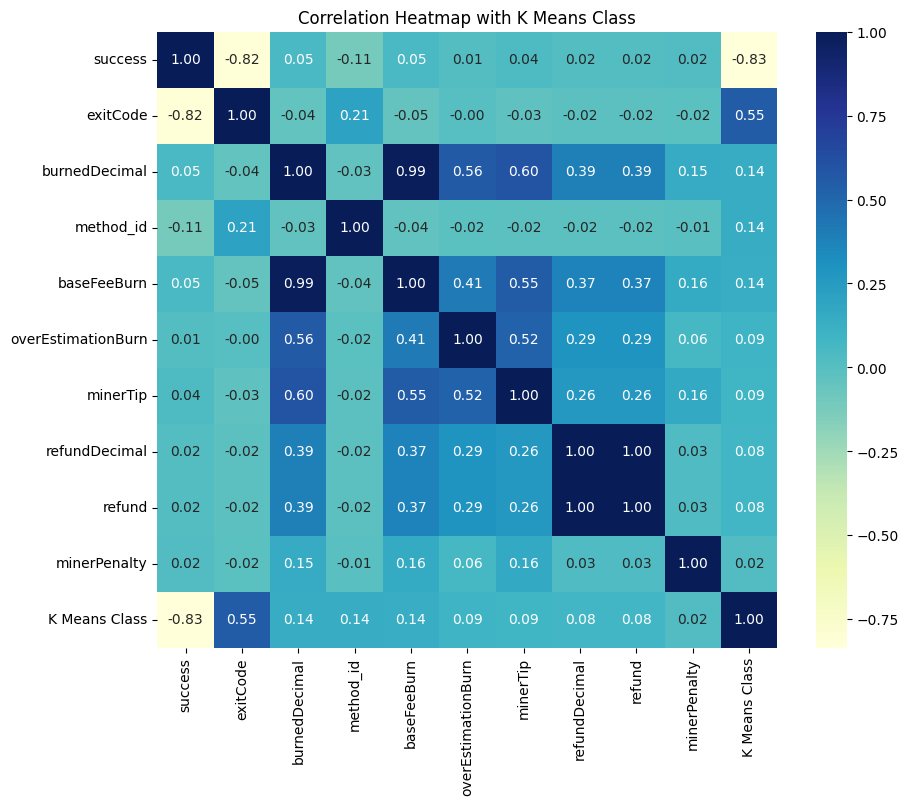

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = num_df.corr()

# Filter only correlations with 'K Means Class'
kmeans_corr = correlation_matrix['K Means Class'].drop('K Means Class')

# Sort correlations in descending order
kmeans_corr_sorted = kmeans_corr.abs().sort_values(ascending=False)

# Select top correlated features
top_features = kmeans_corr_sorted.index[:10]  # Adjust the number of top features as needed

# Extract top correlated features and 'K Means Class'
top_corr_df = num_df[top_features].copy()
top_corr_df['K Means Class'] = num_df['K Means Class']

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_df.corr(), cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Correlation Heatmap with K Means Class')
plt.show()


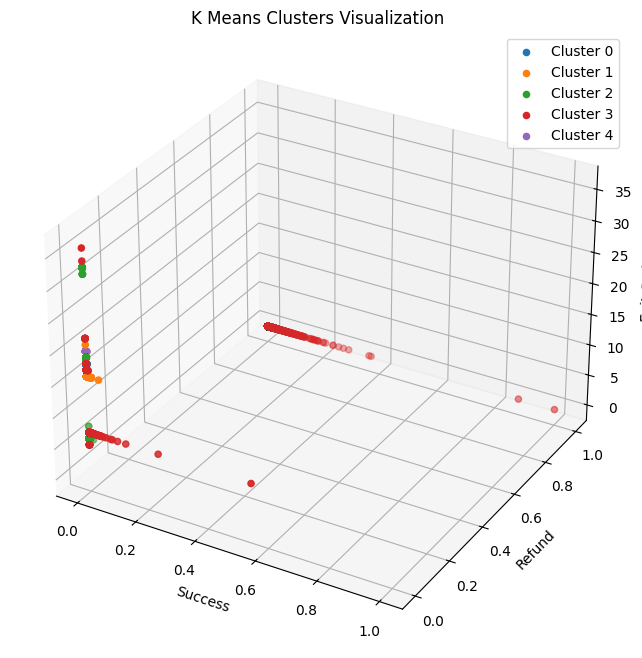

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Filter data for the required columns and non-null values
filtered_data = num_df[['success', 'refund', 'exitCode', 'K Means Class']].dropna()

# Extract columns for plotting
success = filtered_data['success']
refund = filtered_data['refund']
exit_code = filtered_data['exitCode']
clusters = filtered_data['K Means Class']

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster separately
for cluster in sorted(clusters.unique()):
    cluster_data = filtered_data[filtered_data['K Means Class'] == cluster]
    ax.scatter( cluster_data['refund'],cluster_data['success'], cluster_data['exitCode'], label=f'Cluster {cluster}')

# Set labels and title
ax.set_xlabel('Success')
ax.set_ylabel('Refund')
ax.set_zlabel('Exit Code')
ax.set_title('K Means Clusters Visualization')

# Add legend
ax.legend()

# Show plot
plt.show()


2. Bisecting K Means

In [33]:
from sklearn.cluster import BisectingKMeans
import pandas as pd


X = famd_df_for_cluster
# Initialize the Bisecting K-Means model
bkm = BisectingKMeans(n_clusters=5)  # You can change the number of clusters as needed

# Fit the model to your data
bkm.fit(X)

# Get cluster labels
cluster_labels = bkm.labels_

# Assign the cluster labels back to your dataframe
clustered_num_df['Bisected K Means Class'] = cluster_labels


In [34]:
unique_values_bisected = clustered_num_df['Bisected K Means Class'].unique()

print(unique_values_bisected)

[1 0 2 3 4]


In [35]:
value_counts_bisected = clustered_num_df['Bisected K Means Class'].value_counts()

print(value_counts_bisected)

Bisected K Means Class
1    83633
2    38342
0    18145
3    14448
4     1432
Name: count, dtype: int64


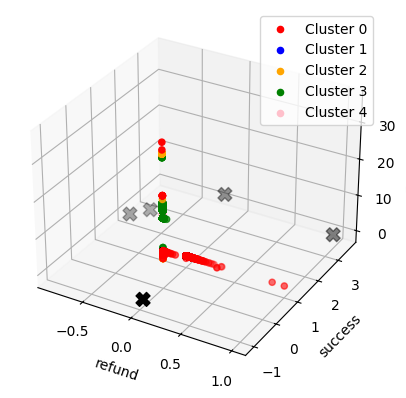

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing Axes3D from mpl_toolkits.mplot3d

# Assuming 'famd_df' contains the data
# Assuming 'centroids' contains the centroid coordinates (you need to define centroids)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Use add_subplot to create a 3D subplot

# Assuming 'x', 'y', 'z' are your variables
x = np.array(famd_df['refund'])
y = np.array(famd_df['success'])
z = np.array(famd_df['exitCode'])

# Assuming 'famd_df' has a column 'Class' indicating the assigned cluster for each data point
cluster_labels = clustered_num_df['Bisected K Means Class']

# Define colors for each cluster
colors = ['r', 'b', 'orange', 'g', 'pink']  # Adjust as needed for 5 clusters

# Plotting data points for each cluster
for cluster_label, color in zip(np.unique(cluster_labels), colors):
    cluster_mask = (cluster_labels == cluster_label)
    ax.scatter(x[cluster_mask], y[cluster_mask], z[cluster_mask], c=color, label=f'Cluster {cluster_label}')

# Plotting centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker="X", color='black', s=100)  # Assuming centroids are in 3D space

# Labeling axes
ax.set_xlabel('refund')
ax.set_ylabel('success')
ax.set_zlabel('Exit Code')

# Adding legend
ax.legend()

plt.show()

3. DBSCAN


how to choose eps and min_points https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan

In [37]:
famd_df_for_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156000 entries, 147 to 2655998
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   FAMD1   156000 non-null  float64
 1   FAMD2   156000 non-null  float64
 2   FAMD3   156000 non-null  float64
 3   FAMD4   156000 non-null  float64
 4   FAMD5   156000 non-null  float64
 5   FAMD6   156000 non-null  float64
 6   FAMD7   156000 non-null  float64
 7   FAMD8   156000 non-null  float64
 8   FAMD9   156000 non-null  float64
 9   FAMD10  156000 non-null  float64
 10  FAMD11  156000 non-null  float64
 11  FAMD12  156000 non-null  float64
dtypes: float64(12)
memory usage: 15.5 MB


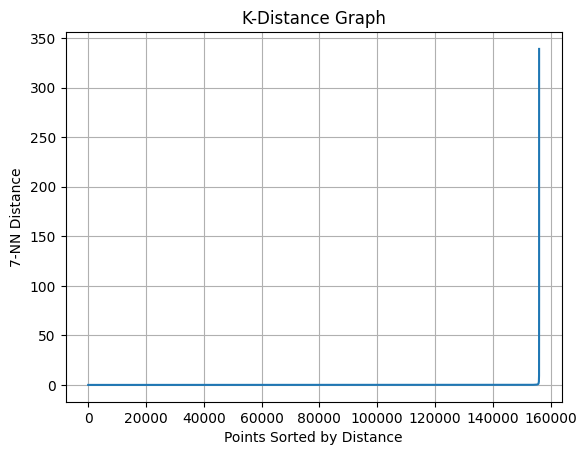

In [38]:
knn = NearestNeighbors(n_neighbors = 13)
model = knn.fit(famd_df_for_cluster)
distances, indices = knn.kneighbors(famd_df_for_cluster)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph');

In [39]:
from sklearn.cluster import DBSCAN

# Define parameters
eps = 5
min_samples = 35
batch_size = 10000  


all_labels = []
all_core_sample_indices = []

# Iterate over batches
for start_idx in range(0, len(famd_df_for_cluster), batch_size):
    end_idx = start_idx + batch_size
    batch_data = famd_df_for_cluster[start_idx:end_idx]

    # Run DBSCAN on the current batch
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(batch_data)
    all_labels.extend(db.labels_)
    all_core_sample_indices.extend(db.core_sample_indices_ + start_idx)

all_labels = np.array(all_labels)
all_core_sample_indices = np.array(all_core_sample_indices)

# Number of clusters, ignoring noise
n_clusters_ = len(set(all_labels)) - (1 if -1 in all_labels else 0)
n_noise_ = list(all_labels).count(-1)

print('Number of Clusters:', n_clusters_)
print('Number of Outliers:', n_noise_)

Number of Clusters: 8
Number of Outliers: 1902


In [40]:
from sklearn.cluster import DBSCAN

# Define parameters
eps = 2.5
min_samples = 45
batch_size = 10000  # Adjust the batch size based on your memory constraints

# Initialize variables to store cluster labels and core sample indices
all_labels = []
all_core_sample_indices = []

# Iterate over batches
for start_idx in range(0, len(famd_df_for_cluster), batch_size):
    end_idx = start_idx + batch_size
    batch_data = famd_df_for_cluster[start_idx:end_idx]

    # Run DBSCAN on the current batch
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(batch_data)

    # Collect cluster labels and core sample indices
    all_labels.extend(db.labels_)
    all_core_sample_indices.extend(db.core_sample_indices_ + start_idx)

# Convert lists to arrays
all_labels = np.array(all_labels)
all_core_sample_indices = np.array(all_core_sample_indices)

# Number of clusters, ignoring noise
n_clusters_ = len(set(all_labels)) - (1 if -1 in all_labels else 0)
n_noise_ = list(all_labels).count(-1)

print('Number of Clusters:', n_clusters_)
print('Number of Outliers:', n_noise_)

Number of Clusters: 17
Number of Outliers: 5048


In [41]:
from sklearn.cluster import DBSCAN

# Define parameters
eps = 1
min_samples = 35
batch_size = 10000  # Adjust the batch size based on your memory constraints

# Initialize variables to store cluster labels and core sample indices
all_labels = []
all_core_sample_indices = []

# Iterate over batches
for start_idx in range(0, len(famd_df_for_cluster), batch_size):
    end_idx = start_idx + batch_size
    batch_data = famd_df_for_cluster[start_idx:end_idx]

    # Run DBSCAN on the current batch
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(batch_data)

    # Collect cluster labels and core sample indices
    all_labels.extend(db.labels_)
    all_core_sample_indices.extend(db.core_sample_indices_ + start_idx)

# Convert lists to arrays
all_labels = np.array(all_labels)
all_core_sample_indices = np.array(all_core_sample_indices)

# Number of clusters, ignoring noise
n_clusters_ = len(set(all_labels)) - (1 if -1 in all_labels else 0)
n_noise_ = list(all_labels).count(-1)

print('Number of Clusters:', n_clusters_)
print('Number of Outliers:', n_noise_)

Number of Clusters: 24
Number of Outliers: 6378


In [42]:
unique_labels = set(all_labels)
print(unique_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, -1}


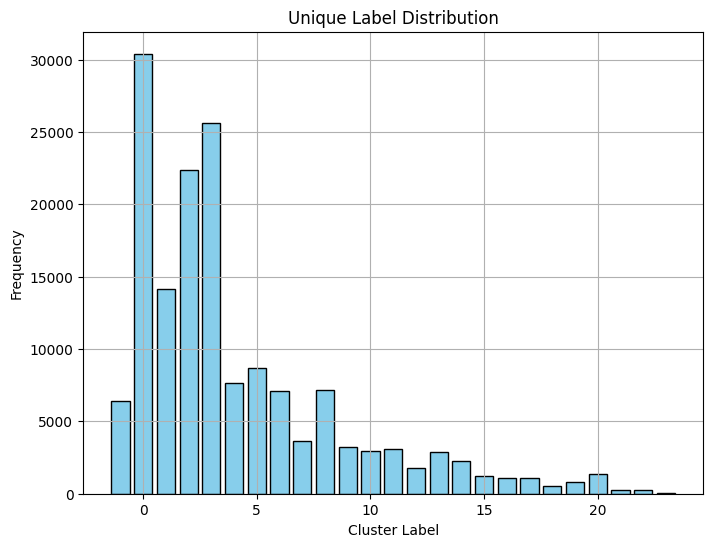

In [43]:
import matplotlib.pyplot as plt

# Count occurrences of each unique label
label_counts = {label: list(all_labels).count(label) for label in set(all_labels)}

# Plot label distribution
plt.figure(figsize=(8, 6))
plt.bar(label_counts.keys(), label_counts.values(), color='skyblue', edgecolor='black')
plt.title('Unique Label Distribution')
plt.xlabel('Cluster Label')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Rejected: this method is rejected as the distribution of records is not even... a vast majority of the records fall under the 0 category

4. BIRCH

In [24]:
from sklearn.cluster import Birch


birch = Birch(threshold=0.025, n_clusters=5) 


birch.fit(famd_df_for_cluster) 


birch_labels = birch.labels_


n_clusters_birch = len(set(birch_labels)) - (1 if -1 in birch_labels else 0)
n_noise_birch = list(birch_labels).count(-1)

print('Number of Clusters (BIRCH):', n_clusters_birch)
print('Number of Noise Points (BIRCH):', n_noise_birch)


Number of Clusters (BIRCH): 5
Number of Noise Points (BIRCH): 0


In [23]:
from collections import Counter

# Count occurrences of each unique cluster label
cluster_counts = Counter(birch_labels)

# Print the distribution of values in Birch labels
for label, count in cluster_counts.items():
    print(f'Label {label}: {count} occurrences')

Label 0: 156000 occurrences


Rejected. Uneven distribution of records.

5. Agglomerative Clustering

In [46]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd

def batch_cluster(data, batch_size, n_clusters, linkage='ward'):
    n_samples = len(data)
    n_batches = (n_samples + batch_size - 1) // batch_size
    
    cluster_labels = np.zeros(n_samples, dtype=int)
    total_clusters = 0  # Initialize total_clusters
    
    for i in range(n_batches):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, n_samples)
        
        batch_data = data.iloc[start_idx:end_idx]  # Assuming data is a DataFrame
        
        # Perform clustering on the batch
        clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        batch_labels = clustering.fit_predict(batch_data)
        
        # Update cluster labels with an offset
        cluster_labels[start_idx:end_idx] = batch_labels + total_clusters
        
        # Update total_clusters for the next batch
        total_clusters += n_clusters
    
    return cluster_labels


# Example usage
# Assuming 'famd_df_for_cluster' is your DataFrame
X = famd_df_for_cluster

# Parameters
batch_size = 1000
n_clusters = 5

# Perform batch clustering
cluster_labels = batch_cluster(X, batch_size, n_clusters)

# Assign the cluster labels back to your DataFrame
clustered_num_df['Agglomerative Cluster'] = cluster_labels


In [47]:
unique_values_bisected = clustered_num_df['Agglomerative Cluster'].unique()

print(unique_values_bisected)

[  0   2   4   3   1   6   7   9   5   8  10  12  14  11  13  15  16  19
  17  18  20  24  21  22  23  25  28  26  29  27  30  34  31  32  33  37
  35  38  36  39  40  43  42  41  44  45  46  47  49  48  51  53  54  50
  52  57  55  56  59  58  60  61  62  63  64  65  68  69  66  67  70  72
  74  73  71  76  75  78  77  79  80  82  84  83  81  86  87  88  85  89
  92  90  91  94  93  96  99  95  98  97 100 101 104 103 102 106 107 109
 105 108 110 111 114 112 113 115 118 117 116 119 120 124 122 121 123 127
 125 126 129 128 132 130 134 131 133 137 136 139 135 138 142 141 140 144
 143 149 146 147 145 148 152 150 151 154 153 155 156 159 157 158 160 163
 162 161 164 167 165 168 169 166 171 172 174 170 173 177 178 175 176 179
 180 184 182 183 181 186 189 185 188 187 192 194 191 190 193 195 196 197
 199 198 200 203 201 204 202 205 206 208 207 209 211 214 212 210 213 216
 217 215 219 218 224 223 221 220 222 226 225 229 227 228 233 231 230 234
 232 236 235 237 239 238 241 242 240 244 243 247 24

In [48]:
value_counts_bisected = clustered_num_df['Agglomerative Cluster'].value_counts()

print(value_counts_bisected)

Agglomerative Cluster
540    958
195    935
510    931
315    924
740    917
      ... 
249      1
383      1
188      1
538      1
198      1
Name: count, Length: 780, dtype: int64


Agglomerative Clustering: Rejected (Too Many SKU's)

No we have identified that Bisected K Means and K Means produce the best results

Next Step: Data Post Processing

Post Processing: K Means

In [104]:
clustered_num_df.columns

Index(['method_id', 'refundDecimal', 'refund', 'amountDecimal',
       'burnedDecimal', 'overEstimationBurn', 'baseFeeBurn', 'success',
       'minerPenalty', 'minerTip', 'exitCode', 'K Means Class',
       'Bisected K Means Class', 'Agglomerative Cluster'],
      dtype='object')

In [50]:
import pandas as pd

# Assuming clustered_num_df is your DataFrame

# Select columns for one-hot encoding
columns_to_encode = ['method_id', 'success', 'exitCode']

# Perform one-hot encoding
one_hot_encoded_df = pd.get_dummies(clustered_num_df, columns=columns_to_encode)*1



# Drop specified columns
one_hot_encoded_kmeans = one_hot_encoded_df.drop(columns=['Agglomerative Cluster', 'Bisected K Means Class'])




In [51]:
one_hot_encoded_kmeans.head()


,refundDecimal,refund,amountDecimal,burnedDecimal,overEstimationBurn,baseFeeBurn,minerPenalty,minerTip,K Means Class,method_id_0,...,exitCode_17,exitCode_18,exitCode_19,exitCode_20,exitCode_21,exitCode_22,exitCode_32,exitCode_33,exitCode_34,exitCode_36
147,4.696145e-14,4.696145e-14,2.155189e-07,1.802885e-13,1.390207e-13,7.481132e-14,0.0,4.051104e-10,0,1,...,0,0,0,0,0,0,0,0,0,0
167,2.479510e-07,2.479510e-07,6.025870e-08,7.669107e-14,3.562486e-15,7.668248e-14,0.0,2.042028e-10,0,1,...,0,0,0,0,0,0,0,0,0,0
193,2.895995e-15,2.895995e-15,6.138557e-08,7.155631e-13,0.000000e+00,7.423132e-13,0.0,0.000000e+00,3,1,...,0,0,0,0,0,0,0,0,0,0
216,2.454716e-14,2.454716e-14,5.608440e-10,7.519019e-14,3.492619e-15,7.518193e-14,0.0,1.799427e-10,0,1,...,0,0,0,0,0,0,0,0,0,0
217,7.640443e-12,7.640443e-12,0.000000e+00,2.379731e-11,1.006111e-12,2.387481e-11,0.0,6.201404e-08,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
one_hot_encoded_kmeans.columns

Index(['refundDecimal', 'refund', 'amountDecimal', 'burnedDecimal',
       'overEstimationBurn', 'baseFeeBurn', 'minerPenalty', 'minerTip',
       'K Means Class', 'method_id_0', 'method_id_1', 'method_id_2',
       'method_id_3', 'method_id_4', 'method_id_5', 'method_id_6',
       'method_id_7', 'method_id_8', 'method_id_9', 'method_id_11',
       'method_id_15', 'method_id_16', 'method_id_18', 'method_id_19',
       'method_id_20', 'method_id_21', 'method_id_22', 'method_id_23',
       'method_id_24', 'method_id_25', 'method_id_26', 'method_id_27',
       'method_id_28', 'method_id_30', 'method_id_32', 'method_id_872461',
       'method_id_3844450837', 'success_0', 'success_1', 'exitCode_0',
       'exitCode_5', 'exitCode_6', 'exitCode_7', 'exitCode_8', 'exitCode_16',
       'exitCode_17', 'exitCode_18', 'exitCode_19', 'exitCode_20',
       'exitCode_21', 'exitCode_22', 'exitCode_32', 'exitCode_33',
       'exitCode_34', 'exitCode_36'],
      dtype='object')

In [53]:
import pandas as pd



# Group by 'sender_account' and calculate count and sum for each group
grouped_df_comb= one_hot_encoded_kmeans.groupby('K Means Class').agg({

    'refundDecimal': 'mean',
    'refund': 'mean',
    'amountDecimal': 'mean',
    'burnedDecimal': 'mean',
    'overEstimationBurn': 'mean',
    'baseFeeBurn': 'mean',
    'success_0': 'mean',
    'success_1': 'mean',
    'minerPenalty': 'mean',
    'minerTip': 'mean',
    'method_id_0': 'sum',
    'method_id_1': 'sum',
    'method_id_2': 'sum',
    'method_id_3': 'sum', 
    'method_id_4': 'sum', 
    'method_id_5': 'sum', 
    'method_id_6': 'sum',
    'method_id_7': 'sum', 
    'method_id_8': 'sum', 
    'method_id_9': 'sum', 
    'method_id_11': 'sum',
    'method_id_15': 'sum', 
    'method_id_16': 'sum', 
    'method_id_18': 'sum', 
    'method_id_19': 'sum',
    'method_id_20': 'sum', 
    'method_id_21': 'sum',
    'method_id_22': 'sum', 
    'method_id_23': 'sum',
    'method_id_24': 'sum', 
    'method_id_25': 'sum', 
    'method_id_26': 'sum', 
    'method_id_27': 'sum',
    'method_id_28': 'sum', 
    'method_id_30': 'sum', 
    'method_id_32': 'sum', 
    'method_id_872461': 'sum',
    'method_id_3844450837':'sum',
    'exitCode_0': 'sum',
    'exitCode_5': 'sum',
    'exitCode_6': 'sum',
    'exitCode_7': 'sum', 
    'exitCode_8': 'sum', 
    'exitCode_16': 'sum', 
    'exitCode_17': 'sum', 
    'exitCode_18': 'sum',
    'exitCode_19': 'sum', 
    'exitCode_20': 'sum', 
    'exitCode_21': 'sum', 
    'exitCode_22': 'sum',
    'exitCode_32': 'sum', 
    'exitCode_33': 'sum', 
    'exitCode_34': 'sum', 
    'exitCode_36': 'sum'})

    # ... (add other exitCode columns you want to sum)



# Reset index to make 'sender_account' a regular column
grouped_df_comb.reset_index(inplace=True)
grouped_df_comb['count'] = one_hot_encoded_kmeans.groupby('K Means Class').size().values

# Display the result

grouped_df_comb.head()




,K Means Class,refundDecimal,refund,amountDecimal,burnedDecimal,overEstimationBurn,baseFeeBurn,success_0,success_1,minerPenalty,...,exitCode_18,exitCode_19,exitCode_20,exitCode_21,exitCode_22,exitCode_32,exitCode_33,exitCode_34,exitCode_36,count
0,0,0.000155,0.000155,1.056711e-05,0.001001,0.000051,0.000997,0.008298,0.991702,0.000158,...,400,0,0,0,0,0,0,0,0,112915
1,1,0.000121,0.000121,1.916256e-08,0.000317,0.000393,0.000011,0.999855,0.000145,0.000027,...,6,0,0,1,0,0,0,0,0,13759
2,2,0.000009,0.000009,1.783486e-04,0.000037,0.000033,0.000012,1.000000,0.000000,0.000010,...,0,337,0,0,0,4,2322,0,0,12888
3,3,0.001939,0.001939,1.623022e-05,0.011093,0.001471,0.010320,0.880531,0.119469,0.000704,...,9,0,0,0,8,0,0,1,1,16339
4,4,0.000188,0.000188,0.000000e+00,0.001846,0.001988,0.000310,1.000000,0.000000,0.000592,...,0,0,99,0,0,0,0,0,0,99


In [54]:
grouped_df_comb.columns

Index(['K Means Class', 'refundDecimal', 'refund', 'amountDecimal',
       'burnedDecimal', 'overEstimationBurn', 'baseFeeBurn', 'success_0',
       'success_1', 'minerPenalty', 'minerTip', 'method_id_0', 'method_id_1',
       'method_id_2', 'method_id_3', 'method_id_4', 'method_id_5',
       'method_id_6', 'method_id_7', 'method_id_8', 'method_id_9',
       'method_id_11', 'method_id_15', 'method_id_16', 'method_id_18',
       'method_id_19', 'method_id_20', 'method_id_21', 'method_id_22',
       'method_id_23', 'method_id_24', 'method_id_25', 'method_id_26',
       'method_id_27', 'method_id_28', 'method_id_30', 'method_id_32',
       'method_id_872461', 'method_id_3844450837', 'exitCode_0', 'exitCode_5',
       'exitCode_6', 'exitCode_7', 'exitCode_8', 'exitCode_16', 'exitCode_17',
       'exitCode_18', 'exitCode_19', 'exitCode_20', 'exitCode_21',
       'exitCode_22', 'exitCode_32', 'exitCode_33', 'exitCode_34',
       'exitCode_36', 'count'],
      dtype='object')

In [98]:

mega_df_kmeans = pd.DataFrame()

rank_columns=['refundDecimal', 'amountDecimal',
       'burnedDecimal', 'overEstimationBurn', 'baseFeeBurn', 'success_0',
       'success_1', 'minerPenalty', 'minerTip', 'method_id_0',
       'method_id_2', 'method_id_4', 'method_id_5',
       'method_id_6', 
       'method_id_11', 'method_id_15',
       'method_id_19',  'method_id_21', 'method_id_22',
        'exitCode_0', 'exitCode_5',
       'exitCode_6', 'exitCode_7', 'exitCode_8', 'exitCode_16', 'exitCode_17',
       'exitCode_18', 'exitCode_19', 'exitCode_20', 'exitCode_21',
       'exitCode_22', 'exitCode_32', 'exitCode_33', 'exitCode_34',
       'exitCode_36', 'count']

one_hot_encoded_kmeans = grouped_df_comb[rank_columns].copy()

for i in rank_columns:
    # Group by 'K Means Class' and rank each column
    ranked_df = grouped_df_comb[i].rank(method='max', ascending=False)
    # Append the ranked column to mega_df
    mega_df_kmeans[i] = ranked_df

print(mega_df_kmeans)

   refundDecimal  amountDecimal  burnedDecimal  overEstimationBurn  \
0            3.0            3.0            3.0                 4.0   
1            4.0            4.0            4.0                 3.0   
2            5.0            1.0            5.0                 5.0   
3            1.0            2.0            1.0                 2.0   
4            2.0            5.0            2.0                 1.0   

   baseFeeBurn  success_0  success_1  minerPenalty  minerTip  method_id_0  \
0          2.0        5.0        1.0           3.0       3.0          1.0   
1          5.0        3.0        3.0           4.0       4.0          5.0   
2          4.0        2.0        5.0           5.0       5.0          2.0   
3          1.0        4.0        2.0           1.0       1.0          3.0   
4          3.0        2.0        5.0           2.0       2.0          5.0   

   ...  exitCode_18  exitCode_19  exitCode_20  exitCode_21  exitCode_22  \
0  ...          1.0          5.0         

Without Weights / Without Customisation

In [59]:
positive_weight_columns = ['amountDecimal', 'success_1', 'minerTip', 'method_id_0', 'method_id_2', 'method_id_4',
                           'method_id_5', 'method_id_6', 'method_id_7', 'method_id_8', 'method_id_19','method_id_20', 'method_id_21', 'exitCode_0']

negative_weight_columns = ['refundDecimal', 'overEstimationBurn', 'success_0', 'minerPenalty', 'method_id_11',
                           'method_id_15', 'method_id_22', 'exitCode_5', 'exitCode_6', 'exitCode_7', 'exitCode_8',
                           'exitCode_16', 'exitCode_17', 'exitCode_18', 'exitCode_19', 'exitCode_20', 'exitCode_21',
                           'exitCode_22', 'exitCode_32', 'exitCode_33', 'exitCode_34', 'exitCode_36']

In [60]:
for col in negative_weight_columns:
    mega_df_kmeans[col] *= -1  # Multiply the column by -1

# Now mega_df contains the rankings for each column
print(mega_df_kmeans)

   refundDecimal  amountDecimal  burnedDecimal  overEstimationBurn  \
0           -3.0            3.0            3.0                -4.0   
1           -4.0            4.0            4.0                -3.0   
2           -5.0            1.0            5.0                -5.0   
3           -1.0            2.0            1.0                -2.0   
4           -2.0            5.0            2.0                -1.0   

   baseFeeBurn  success_0  success_1  minerPenalty  minerTip  method_id_0  \
0          2.0       -5.0        1.0          -3.0       3.0          1.0   
1          5.0       -3.0        3.0          -4.0       4.0          5.0   
2          4.0       -2.0        5.0          -5.0       5.0          2.0   
3          1.0       -4.0        2.0          -1.0       1.0          3.0   
4          3.0       -2.0        5.0          -2.0       2.0          5.0   

   ...  exitCode_18  exitCode_19  exitCode_20  exitCode_21  exitCode_22  \
0  ...         -1.0         -5.0         

In [64]:
# Define the mapping dictionary
value_mapping = {1: 4, 2: 3, 3: 2, 4: 1, 5: 0, -1:-4, -2:-3, -3:-2, -4:-1, -5:0}

# Apply the mapping to the DataFrame
mapped_df = mega_df_kmeans.replace(value_mapping)

# Print the mapped DataFrame
print(mapped_df)


   refundDecimal  amountDecimal  burnedDecimal  overEstimationBurn  \
0           -2.0            2.0            2.0                -1.0   
1           -1.0            1.0            1.0                -2.0   
2            0.0            4.0            0.0                 0.0   
3           -4.0            3.0            4.0                -3.0   
4           -3.0            0.0            3.0                -4.0   

   baseFeeBurn  success_0  success_1  minerPenalty  minerTip  method_id_0  \
0          3.0        0.0        4.0          -2.0       2.0          4.0   
1          0.0       -2.0        2.0          -1.0       1.0          0.0   
2          1.0       -3.0        0.0           0.0       0.0          3.0   
3          4.0       -1.0        3.0          -4.0       4.0          2.0   
4          2.0       -3.0        0.0          -3.0       3.0          0.0   

   ...  exitCode_18  exitCode_19  exitCode_20  exitCode_21  exitCode_22  \
0  ...         -4.0          0.0         

In [65]:
mapped_df['sum'] = mapped_df.sum(axis=1)

# Print the DataFrame with the new 'sum' column
print(mapped_df)

   refundDecimal  amountDecimal  burnedDecimal  overEstimationBurn  \
0           -2.0            2.0            2.0                -1.0   
1           -1.0            1.0            1.0                -2.0   
2            0.0            4.0            0.0                 0.0   
3           -4.0            3.0            4.0                -3.0   
4           -3.0            0.0            3.0                -4.0   

   baseFeeBurn  success_0  success_1  minerPenalty  minerTip  method_id_0  \
0          3.0        0.0        4.0          -2.0       2.0          4.0   
1          0.0       -2.0        2.0          -1.0       1.0          0.0   
2          1.0       -3.0        0.0           0.0       0.0          3.0   
3          4.0       -1.0        3.0          -4.0       4.0          2.0   
4          2.0       -3.0        0.0          -3.0       3.0          0.0   

   ...  exitCode_19  exitCode_20  exitCode_21  exitCode_22  exitCode_32  \
0  ...          0.0          0.0         

In [ ]:
#what if i remove the exit codes
without_exit=mapped_df.drop(columns=['exitCode_5', 'exitCode_6', 'exitCode_7', 'exitCode_8',
                           'exitCode_16', 'exitCode_17', 'exitCode_18', 'exitCode_19', 'exitCode_20', 'exitCode_21',
                           'exitCode_22', 'exitCode_32', 'exitCode_33', 'exitCode_34', 'exitCode_36'])
without_exit['sum'] = without_exit.sum(axis=1)

# Print the DataFrame with the new 'sum' column
print(without_exit)

   refundDecimal  amountDecimal  burnedDecimal  overEstimationBurn  \
0           -2.0            2.0            2.0                -1.0   
1           -1.0            1.0            1.0                -2.0   
2            0.0            4.0            0.0                 0.0   
3           -4.0            3.0            4.0                -3.0   
4           -3.0            0.0            3.0                -4.0   

   baseFeeBurn  success_0  success_1  minerPenalty  minerTip  method_id_0  \
0          3.0        0.0        4.0          -2.0       2.0          4.0   
1          0.0       -2.0        2.0          -1.0       1.0          0.0   
2          1.0       -3.0        0.0           0.0       0.0          3.0   
3          4.0       -1.0        3.0          -4.0       4.0          2.0   
4          2.0       -3.0        0.0          -3.0       3.0          0.0   

   ...  method_id_5  method_id_6  method_id_11  method_id_15  method_id_19  \
0  ...          4.0          4.0      

In [126]:
clustered_num_df.columns

Index(['method_id', 'refundDecimal', 'refund', 'amountDecimal',
       'burnedDecimal', 'overEstimationBurn', 'baseFeeBurn', 'success',
       'minerPenalty', 'minerTip', 'exitCode', 'K Means Class',
       'Bisected K Means Class', 'Agglomerative Cluster'],
      dtype='object')

In [127]:
k_menas_df=clustered_num_df.drop(columns=['Bisected K Means Class', 'Agglomerative Cluster'])

In [128]:

final_scores_kmeans = pd.concat([k_means_df, attribute_df], axis=1)

# Reset index after concatenation
final_scores_kmeans.reset_index(drop=True, inplace=True)

# Display the concatenated DataFrame
print(final_scores_kmeans)


         method_id  refundDecimal        refund  amountDecimal  burnedDecimal  \
0                0   4.696145e-14  4.696145e-14   2.155189e-07   1.802885e-13   
1                0   2.479510e-07  2.479510e-07   6.025870e-08   7.669107e-14   
2                0   2.895995e-15  2.895995e-15   6.138557e-08   7.155631e-13   
3                0   2.454716e-14  2.454716e-14   5.608440e-10   7.519019e-14   
4                5   7.640443e-12  7.640443e-12   0.000000e+00   2.379731e-11   
...            ...            ...           ...            ...            ...   
155995           2   5.978093e-13  5.978093e-13   0.000000e+00   1.835412e-12   
155996           3   7.125743e-12  7.125743e-12   0.000000e+00   2.640822e-11   
155997  3844450837   3.534308e-13  3.534308e-13   0.000000e+00   1.395236e-11   
155998           5   7.840254e-12  7.840254e-12   0.000000e+00   2.503204e-11   
155999           0   7.770137e-14  7.770137e-14   2.277544e-09   1.921378e-13   

        overEstimationBurn 

In [122]:
final_scores_kmeans.columns

Index(['method_id', 'refundDecimal', 'refund', 'amountDecimal',
       'burnedDecimal', 'overEstimationBurn', 'baseFeeBurn', 'success',
       'minerPenalty', 'minerTip', 'exitCode', 'K Means Class', 'date',
       'sender_account', 'sender_address', 'sender_type', 'receiver_account',
       'receiver_address', 'receiver_type', 'method_name'],
      dtype='object')

In [129]:
#To check if mapping is correct
value_counts1 = final_scores_kmeans['K Means Class'].value_counts()

print(value_counts1)

K Means Class
1.00    112915
0.75     16339
0.50     13759
0.25     12888
0.00        99
Name: count, dtype: int64


In [138]:
results_kmeans_data_sender=final_scores_kmeans[['date','sender_account','K Means Class']]
grouped_df_sender = results_kmeans_data_sender.groupby('sender_account').agg({
    'date': 'count', 'K Means Class':'mean'})

grouped_df_sender = grouped_df_sender.rename(columns={'date': 'count'})
grouped_df_sender.reset_index(inplace=True)


In [139]:
print(grouped_df_sender)

      sender_account  count  K Means Class
0                f00     12       1.000000
1           f0100027      9       0.944444
2           f0100056      4       0.625000
3           f0100057      6       0.750000
4           f0100061      1       1.000000
...              ...    ...            ...
47410        f099925      1       1.000000
47411        f099937     12       0.666667
47412        f099944      1       1.000000
47413        f099954      4       1.000000
47414        f099955      7       0.857143

[47415 rows x 3 columns]


In [140]:
grouped_df_sender = grouped_df_sender.rename(columns={'sender_account': 'account'})
grouped_df_sender.reset_index(inplace=True)

In [142]:
results_kmeans_data_receiver=final_scores_kmeans[['date','receiver_account','K Means Class']]
grouped_df_receiver = results_kmeans_data_receiver.groupby('receiver_account').agg({
    'date': 'count', 'K Means Class':'mean'})
grouped_df_receiver= grouped_df_receiver.rename(columns={'date': 'count'})
grouped_df_receiver.reset_index(inplace=True)


In [143]:
grouped_df_receiver = grouped_df_receiver.rename(columns={'receiver_account': 'account'})
grouped_df_receiver.reset_index(inplace=True)

In [149]:
k_means_results_final=pd.concat([grouped_df_sender,grouped_df_receiver],axis=0)
k_means_results_final=k_means_results_final.groupby('account').agg({
    'count': 'sum', 'K Means Class':'mean'})
k_means_results_final.reset_index(inplace=True)

In [152]:
#this is out final reputation score dataframe
k_means_results_final.()

,account,count,K Means Class
0,f00,12,1.000000
1,f01,24,0.958333
2,f010,14,0.910714
3,f0100027,9,0.944444
4,f0100033,16,0.750000


In [178]:
# Assuming 'df' is your DataFrame
rows_f681832= k_means_results_final[k_means_results_final['account'] == 'f090896']
rows_f01628199= k_means_results_final[k_means_results_final['account'] == 'f01628199']
rows_f01438385= k_means_results_final[k_means_results_final['account'] == 'f01438385']
rows_f0480190= k_means_results_final[k_means_results_final['account'] == 'f0480190']
# Display or use the extracted rows
print(rows_f681832)
print(rows_f01628199)
print(rows_f01438385)
print(rows_f0480190)


       account  count  K Means Class
84770  f090896      2          0.375
         account  count  K Means Class
23878  f01628199     12           0.75
         account  count  K Means Class
16209  f01438385     12       0.791667
        account  count  K Means Class
76406  f0480190      3            1.0


In [180]:
# Assuming 'df' is your DataFrame
rows_f01956427= k_means_results_final[k_means_results_final['account'] == 'f01956427']
rows_f01928087= k_means_results_final[k_means_results_final['account'] == 'f01928087']
rows_f01438385= k_means_results_final[k_means_results_final['account'] == 'f01438385']
rows_f0480190= k_means_results_final[k_means_results_final['account'] == 'f0480190']
# Display or use the extracted rows
print(rows_f01956427)
print(rows_f01928087)


         account  count  K Means Class
43138  f01956427     13            1.0
         account  count  K Means Class
41064  f01928087      1            1.0


In [ ]:



# Group by 'sender_account' and calculate count and sum for each group
grouped_df_comb_bisected= one_hot_encoded_bisectedkmeans.groupby('Bisected K Means Class').agg({
    'refundDecimal': 'mean',
    'refund': 'mean',
    'amountDecimal': 'mean',
    'burnedDecimal': 'mean',
    'overEstimationBurn': 'mean',
    'baseFeeBurn': 'mean',
    'success_0': 'mean',
    'success_1': 'mean',
    'minerPenalty': 'mean',
    'minerTip': 'mean',
    'method_id_0': 'sum',
    'method_id_1': 'sum',
    'method_id_2': 'sum',
    'method_id_3': 'sum', 
    'method_id_4': 'sum', 
    'method_id_5': 'sum', 
    'method_id_6': 'sum',
    'method_id_7': 'sum', 
    'method_id_8': 'sum', 
    'method_id_9': 'sum', 
    'method_id_11': 'sum',
    'method_id_15': 'sum', 
    'method_id_16': 'sum', 
    'method_id_18': 'sum', 
    'method_id_19': 'sum',
    'method_id_20': 'sum', 
    'method_id_21': 'sum',
    'method_id_22': 'sum', 
    'method_id_23': 'sum',
    'method_id_24': 'sum', 
    'method_id_25': 'sum', 
    'method_id_26': 'sum', 
    'method_id_27': 'sum',
    'method_id_28': 'sum', 
    'method_id_30': 'sum', 
    'method_id_32': 'sum', 
    'method_id_872461': 'sum',
    'method_id_3844450837':'sum',
    'exitCode_0': 'sum',
    'exitCode_5': 'sum',
    'exitCode_6': 'sum',
    'exitCode_7': 'sum', 
    'exitCode_8': 'sum', 
    'exitCode_16': 'sum', 
    'exitCode_17': 'sum', 
    'exitCode_18': 'sum',
    'exitCode_19': 'sum', 
    'exitCode_20': 'sum', 
    'exitCode_21': 'sum', 
    'exitCode_22': 'sum',
    'exitCode_32': 'sum', 
    'exitCode_33': 'sum', 
    'exitCode_34': 'sum', 
    'exitCode_36': 'sum'})


# Reset index to make 'sender_account' a regular column
grouped_df_comb_bisected.reset_index(inplace=True)
grouped_df_comb_bisected['count'] = one_hot_encoded_bisectedkmeans.groupby('Bisected K Means Class').size().values

# Display the result

grouped_df_comb_bisected.head()




,Bisected K Means Class,refundDecimal,refund,amountDecimal,burnedDecimal,overEstimationBurn,baseFeeBurn,success_0,success_1,minerPenalty,...,exitCode_18,exitCode_19,exitCode_20,exitCode_21,exitCode_22,exitCode_32,exitCode_33,exitCode_34,exitCode_36,count
0,0,0.001835,0.001835,3.685247e-05,0.010788,0.001373,0.010083,0.768752,0.231248,0.000828,...,0,0,0,0,8,0,0,1,1,18145
1,1,0.000132,0.000132,1.405888e-05,0.001075,0.000054,0.001072,0.000000,1.000000,0.000168,...,0,0,0,0,0,0,0,0,0,83633
2,2,0.000127,0.000127,4.986530e-05,0.000228,0.000017,0.000223,0.319336,0.680664,0.000008,...,0,0,0,1,0,0,2322,0,0,38342
3,3,0.000119,0.000119,2.510655e-08,0.000330,0.000398,0.000020,0.999654,0.000346,0.000039,...,299,277,99,0,0,4,0,0,0,14448
4,4,0.000032,0.000032,2.919208e-07,0.000034,0.000029,0.000012,1.000000,0.000000,0.000002,...,116,60,0,0,0,0,0,0,0,1432


Bisected K Means

In [166]:
one_hot_encoded_bisectedkmeans= one_hot_encoded_df.drop(columns=['Agglomerative Cluster', 'K Means Class'])
one_hot_encoded_bisectedkmeans.columns

Index(['refundDecimal', 'refund', 'amountDecimal', 'burnedDecimal',
       'overEstimationBurn', 'baseFeeBurn', 'minerPenalty', 'minerTip',
       'Bisected K Means Class', 'method_id_0', 'method_id_1', 'method_id_2',
       'method_id_3', 'method_id_4', 'method_id_5', 'method_id_6',
       'method_id_7', 'method_id_8', 'method_id_9', 'method_id_11',
       'method_id_15', 'method_id_16', 'method_id_18', 'method_id_19',
       'method_id_20', 'method_id_21', 'method_id_22', 'method_id_23',
       'method_id_24', 'method_id_25', 'method_id_26', 'method_id_27',
       'method_id_28', 'method_id_30', 'method_id_32', 'method_id_872461',
       'method_id_3844450837', 'success_0', 'success_1', 'exitCode_0',
       'exitCode_5', 'exitCode_6', 'exitCode_7', 'exitCode_8', 'exitCode_16',
       'exitCode_17', 'exitCode_18', 'exitCode_19', 'exitCode_20',
       'exitCode_21', 'exitCode_22', 'exitCode_32', 'exitCode_33',
       'exitCode_34', 'exitCode_36'],
      dtype='object')

In [167]:



# Group by 'sender_account' and calculate count and sum for each group
grouped_df_comb_bisected= one_hot_encoded_bisectedkmeans.groupby('Bisected K Means Class').agg({
    'refundDecimal': 'mean',
    'refund': 'mean',
    'amountDecimal': 'mean',
    'burnedDecimal': 'mean',
    'overEstimationBurn': 'mean',
    'baseFeeBurn': 'mean',
    'success_0': 'mean',
    'success_1': 'mean',
    'minerPenalty': 'mean',
    'minerTip': 'mean',
    'method_id_0': 'sum',
    'method_id_1': 'sum',
    'method_id_2': 'sum',
    'method_id_3': 'sum', 
    'method_id_4': 'sum', 
    'method_id_5': 'sum', 
    'method_id_6': 'sum',
    'method_id_7': 'sum', 
    'method_id_8': 'sum', 
    'method_id_9': 'sum', 
    'method_id_11': 'sum',
    'method_id_15': 'sum', 
    'method_id_16': 'sum', 
    'method_id_18': 'sum', 
    'method_id_19': 'sum',
    'method_id_20': 'sum', 
    'method_id_21': 'sum',
    'method_id_22': 'sum', 
    'method_id_23': 'sum',
    'method_id_24': 'sum', 
    'method_id_25': 'sum', 
    'method_id_26': 'sum', 
    'method_id_27': 'sum',
    'method_id_28': 'sum', 
    'method_id_30': 'sum', 
    'method_id_32': 'sum', 
    'method_id_872461': 'sum',
    'method_id_3844450837':'sum',
    'exitCode_0': 'sum',
    'exitCode_5': 'sum',
    'exitCode_6': 'sum',
    'exitCode_7': 'sum', 
    'exitCode_8': 'sum', 
    'exitCode_16': 'sum', 
    'exitCode_17': 'sum', 
    'exitCode_18': 'sum',
    'exitCode_19': 'sum', 
    'exitCode_20': 'sum', 
    'exitCode_21': 'sum', 
    'exitCode_22': 'sum',
    'exitCode_32': 'sum', 
    'exitCode_33': 'sum', 
    'exitCode_34': 'sum', 
    'exitCode_36': 'sum'})


# Reset index to make 'sender_account' a regular column
grouped_df_comb_bisected.reset_index(inplace=True)
grouped_df_comb_bisected['count'] = one_hot_encoded_bisectedkmeans.groupby('Bisected K Means Class').size().values

# Display the result

grouped_df_comb_bisected.head()




,Bisected K Means Class,refundDecimal,refund,amountDecimal,burnedDecimal,overEstimationBurn,baseFeeBurn,success_0,success_1,minerPenalty,...,exitCode_18,exitCode_19,exitCode_20,exitCode_21,exitCode_22,exitCode_32,exitCode_33,exitCode_34,exitCode_36,count
0,0,0.001835,0.001835,3.685247e-05,0.010788,0.001373,0.010083,0.768752,0.231248,0.000828,...,0,0,0,0,8,0,0,1,1,18145
1,1,0.000132,0.000132,1.405888e-05,0.001075,0.000054,0.001072,0.000000,1.000000,0.000168,...,0,0,0,0,0,0,0,0,0,83633
2,2,0.000127,0.000127,4.986530e-05,0.000228,0.000017,0.000223,0.319336,0.680664,0.000008,...,0,0,0,1,0,0,2322,0,0,38342
3,3,0.000119,0.000119,2.510655e-08,0.000330,0.000398,0.000020,0.999654,0.000346,0.000039,...,299,277,99,0,0,4,0,0,0,14448
4,4,0.000032,0.000032,2.919208e-07,0.000034,0.000029,0.000012,1.000000,0.000000,0.000002,...,116,60,0,0,0,0,0,0,0,1432


In [168]:
one_hot_encoded_bisectedkmeans = grouped_df_comb[rank_columns].copy()
mega_df_bisected_kmeans = pd.DataFrame()

for i in rank_columns:
    # Group by 'K Means Class' and rank each column
    ranked_df = grouped_df_comb[i].rank(method='max', ascending=False)
    # Append the ranked column to mega_df
    mega_df_bisected_kmeans[i] = ranked_df

# Now mega_df contains the rankings for each column in columns_to_rank for each cluster
print(mega_df_bisected_kmeans)

   refundDecimal  amountDecimal  burnedDecimal  overEstimationBurn  \
0            3.0            3.0            3.0                 4.0   
1            4.0            4.0            4.0                 3.0   
2            5.0            1.0            5.0                 5.0   
3            1.0            2.0            1.0                 2.0   
4            2.0            5.0            2.0                 1.0   

   baseFeeBurn  success_0  success_1  minerPenalty  minerTip  method_id_0  \
0          2.0        5.0        1.0           3.0       3.0          1.0   
1          5.0        3.0        3.0           4.0       4.0          5.0   
2          4.0        2.0        5.0           5.0       5.0          2.0   
3          1.0        4.0        2.0           1.0       1.0          3.0   
4          3.0        2.0        5.0           2.0       2.0          5.0   

   ...  exitCode_18  exitCode_19  exitCode_20  exitCode_21  exitCode_22  \
0  ...          1.0          5.0         

In [173]:
for col in negative_weight_columns:
    mega_df_bisected_kmeans[col] *= -1  # Multiply the column by -1

# Now mega_df contains the rankings for each column
print(mega_df_bisected_kmeans)

   refundDecimal  amountDecimal  burnedDecimal  overEstimationBurn  \
0           -3.0            3.0            3.0                -4.0   
1           -4.0            4.0            4.0                -3.0   
2           -5.0            1.0            5.0                -5.0   
3           -1.0            2.0            1.0                -2.0   
4           -2.0            5.0            2.0                -1.0   

   baseFeeBurn  success_0  success_1  minerPenalty  minerTip  method_id_0  \
0          2.0       -5.0        1.0          -3.0       3.0          1.0   
1          5.0       -3.0        3.0          -4.0       4.0          5.0   
2          4.0       -2.0        5.0          -5.0       5.0          2.0   
3          1.0       -4.0        2.0          -1.0       1.0          3.0   
4          3.0       -2.0        5.0          -2.0       2.0          5.0   

   ...  exitCode_18  exitCode_19  exitCode_20  exitCode_21  exitCode_22  \
0  ...         -1.0         -5.0         

In [174]:
# Define the mapping dictionary
value_mapping = {1: 4, 2: 3, 3: 2, 4: 1, 5: 0, -1:-4, -2:-3, -3:-2, -4:-1, -5:0}

# Apply the mapping to the DataFrame
mapped_df_bisected_kmeans= mega_df_bisected_kmeans.replace(value_mapping)

mapped_df_bisected_kmeans['sum'] = mapped_df_bisected_kmeans.sum(axis=1)

# Print the DataFrame with the new 'sum' column
print(mapped_df_bisected_kmeans)

   refundDecimal  amountDecimal  burnedDecimal  overEstimationBurn  \
0           -2.0            2.0            2.0                -1.0   
1           -1.0            1.0            1.0                -2.0   
2            0.0            4.0            0.0                 0.0   
3           -4.0            3.0            4.0                -3.0   
4           -3.0            0.0            3.0                -4.0   

   baseFeeBurn  success_0  success_1  minerPenalty  minerTip  method_id_0  \
0          3.0        0.0        4.0          -2.0       2.0          4.0   
1          0.0       -2.0        2.0          -1.0       1.0          0.0   
2          1.0       -3.0        0.0           0.0       0.0          3.0   
3          4.0       -1.0        3.0          -4.0       4.0          2.0   
4          2.0       -3.0        0.0          -3.0       3.0          0.0   

   ...  exitCode_19  exitCode_20  exitCode_21  exitCode_22  exitCode_32  \
0  ...          0.0          0.0         

THESE CLUSTER MAPPING RESULTS ARE THE SAME!